# Stolen Vehicle 

## Introduction

In this project, we embark on an in-depth analysis of vehicle theft data spanning 2021 and 2022. By exploring various attributes of stolen vehicles, including type, model year, and color, we aim to uncover underlying patterns and insights to inform strategies for theft prevention.

### Scope

The scope of this project includes:

1. **Data Cleaning and Preprocessing**: Handling missing values, checking for duplicates, and ensuring data integrity.
2. **Exploratory Data Analysis (EDA)**: Understanding the distribution of vehicle types, colors, and models, as well as exploring temporal patterns in theft incidents.
3. **Feature Engineering**: Creating new features to enhance the predictive power of the dataset.
4. **Model Building and Evaluation**: Developing a logistic regression model to predict the likelihood of a vehicle being a certain type (e.g., trailer) based on other features.


### Objectives

The main objectives of this project are to:

- Analyze the distribution of stolen vehicle types, colors, and models.
- Explore how vehicle theft patterns vary over time (monthly and yearly).
- Investigate which factors are most strongly associated with the likelihood of a vehicle being stolen.
- Build and evaluate a logistic regression model to predict the type of a stolen vehicle.

### Questions to Answer

1. **What are the most commonly stolen vehicle types, colors, and models?**
2. **How do vehicle theft patterns vary over time (monthly, yearly)?**
3. **Which factors are most strongly associated with the likelihood of a vehicle being stolen?**
4. **How accurate is a logistic regression model in predicting the type of a stolen vehicle?**



## Data Preparation

### Step 1: Import Necessary Libraries and Load the Data

To start our analysis, we need to import the required libraries, load the dataset, and get familiar with the data structure. This initial step will help us understand the data and identify any preliminary issues that need to be addressed.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [2]:

r_df = pd.read_csv('stolen_vehicles.csv')
print(r_df.head())

   vehicle_id  vehicle_type  make_id  model_year         vehicle_desc   color  \
0           1       Trailer      623        2021             BST2021D  Silver   
1           2  Boat Trailer      623        2021  OUTBACK BOATS FT470  Silver   
2           3  Boat Trailer      623        2021           ASD JETSKI  Silver   
3           4       Trailer      623        2021              MSC 7X4  Silver   
4           5       Trailer      623        2018            D-MAX 8X5  Silver   

  date_stolen  location_id  
0     11/5/21          102  
1    12/13/21          105  
2     2/13/22          102  
3    11/13/21          106  
4     1/10/22          102  


In [75]:

# 3. Check for missing values
missing_values = r_df.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
vehicle_id       0
vehicle_type    11
make_id          0
model_year       0
vehicle_desc    18
color            0
date_stolen      0
location_id      0
dtype: int64


Since there are only a few missing values in the dataset, we have decided to drop them. Given their small number, removing these entries is unlikely to significantly impact the analysis results.


In [25]:
# Drop rows with missing values
df = r_df.dropna()

# Verify the removal of missing values
print("Missing Values After Cleaning:")
print(df.isnull().sum())

print("\nShape of Cleaned Dataset:", df.shape)


Missing Values After Cleaning:
vehicle_id      0
vehicle_type    0
make_id         0
model_year      0
vehicle_desc    0
color           0
date_stolen     0
location_id     0
dtype: int64

Shape of Cleaned Dataset: (4509, 8)


In [4]:
# 4. Check for duplicate entries
duplicate_entries = df.duplicated().sum()
print("\nDuplicate Entries:", duplicate_entries)




Duplicate Entries: 0


In [5]:
# 5. Check for incorrect data types

print(df.dtypes)




vehicle_id       int64
vehicle_type    object
make_id          int64
model_year       int64
vehicle_desc    object
color           object
date_stolen     object
location_id      int64
dtype: object


We have noticed that the date_stolen column is incorrectly categorized as an object. To ensure accurate temporal analysis, we will convert this column to a datetime format.


In [4]:

# Convert 'date_stolen' column to datetime
df['date_stolen'] = pd.to_datetime(df['date_stolen'])

# Verify the changes
print("\nData Types after Cleaning:")
print(df.dtypes)


Data Types after Cleaning:
vehicle_id               int64
vehicle_type            object
make_id                  int64
model_year               int64
vehicle_desc            object
color                   object
date_stolen     datetime64[ns]
location_id              int64
dtype: object


C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\2067282843.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_stolen'] = pd.to_datetime(df['date_stolen'])
C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\2067282843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_stolen'] = pd.to_datetime(df['date_stolen'])


### Exploratory Data Analysis (EDA)

In this section, we will perform Exploratory Data Analysis (EDA) to gain insights into the patterns and characteristics of the stolen vehicles dataset. We will visualize the distribution of various features and explore any underlying trends.

#### Distribution of Stolen Vehicle Types

We begin by examining the distribution of different vehicle types that have been stolen. The following plot shows the count of each vehicle type in the dataset:


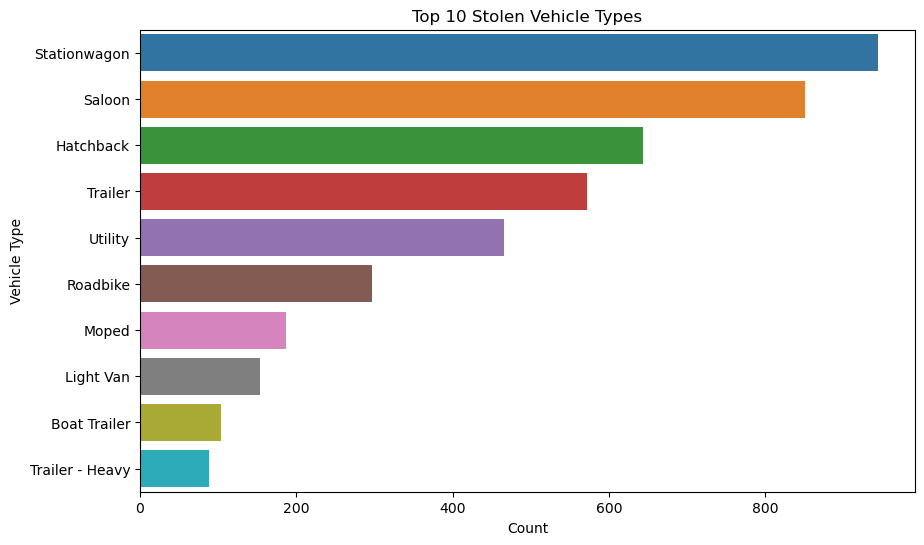

In [7]:
# Plot the distribution of stolen vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(y='vehicle_type', data=df, order=df['vehicle_type'].value_counts().index[:10])
plt.title('Top 10 Stolen Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()



From our analysis of the dataset, we observe significant trends in the types of vehicles most frequently stolen. The following key insights emerge:

1. **Station Wagons**: This type of vehicle has the highest number of thefts, far surpassing any other vehicle type. The popularity of station wagons among thieves could be attributed to their widespread use and availability.

2. **Saloons**: Ranking second, saloons are another commonly stolen vehicle type. Their sleek design and prevalence on the roads make them a frequent target.

3. **Hatchbacks**: Following closely behind saloons, hatchbacks are the third most stolen vehicle type. Their compact size and versatility likely contribute to their high theft rates.

4. **Trailers**: Surprisingly, trailers are the fourth most stolen vehicle type. This might be due to their valuable cargo and utility in various industries.

The combined thefts of station wagons, saloons, hatchbacks, and trailers account for nearly half of all stolen vehicles in the dataset. 

#### Distribution of Stolen Vehicle Models
Next, we will explore the distribution of stolen vehicle models. The following plot shows the top 10 most frequently stolen vehicle models:

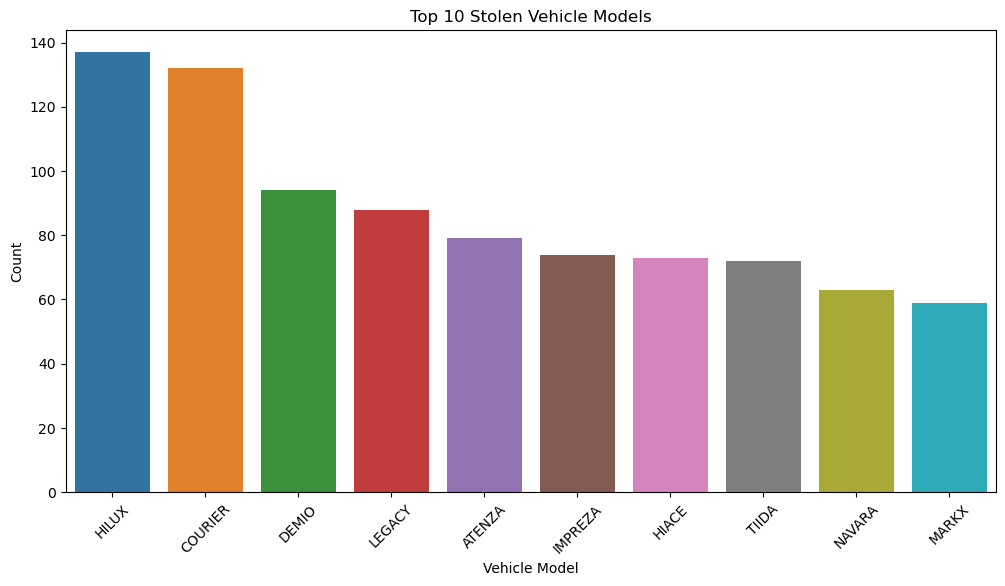

In [8]:

# Distribution of stolen vehicle models
plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_desc', data=df, order=df['vehicle_desc'].value_counts().index[:10])
plt.title('Top 10 Stolen Vehicle Models')
plt.xlabel('Vehicle Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This graph illustrates the frequency of vehicle theft across different models. Notably, the top three most stolen models are Hilux, Courier, and Demio

#### Plotting Temporal Patterns of Vehicle Thefts
In this section, we will visualize the temporal patterns of vehicle thefts to understand how they vary over different time periods. Specifically, we will plot the number of vehicle thefts per year and per month.

C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\1119627759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_stolen'] = df['date_stolen'].dt.year
C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\1119627759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_stolen'] = df['date_stolen'].dt.month


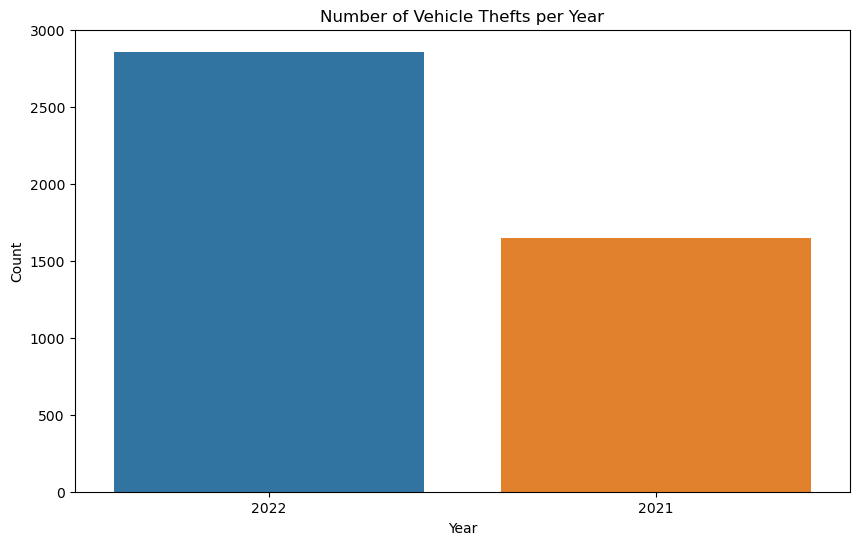

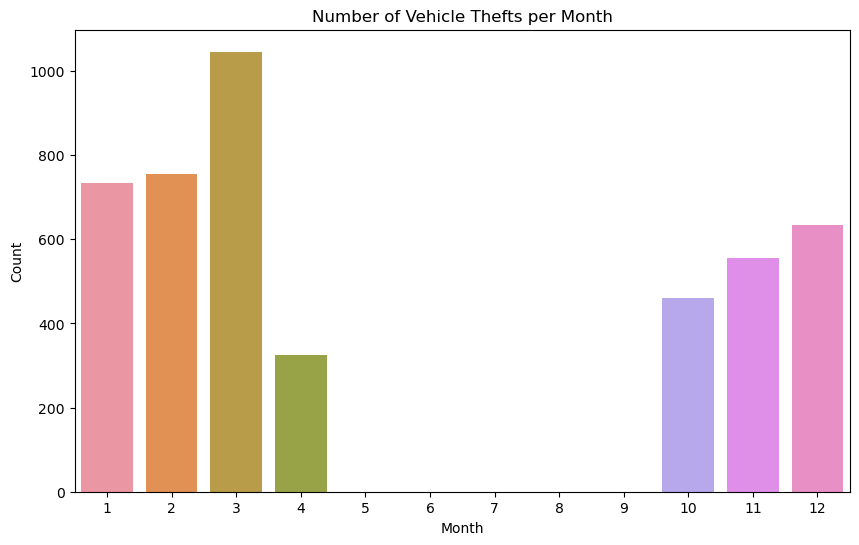

In [5]:
# Extract year and month from the date_stolen
df['year_stolen'] = df['date_stolen'].dt.year
df['month_stolen'] = df['date_stolen'].dt.month

# Plot the number of vehicle thefts per year
plt.figure(figsize=(10, 6))
sns.countplot(x='year_stolen', data=df, order=df['year_stolen'].value_counts().index)
plt.title('Number of Vehicle Thefts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the number of vehicle thefts per month
plt.figure(figsize=(10, 6))
sns.countplot(x='month_stolen', data=df, order=range(1, 13))
plt.title('Number of Vehicle Thefts per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**Graph 1:** Yearly Comparison
The first graph presents a year-on-year comparison of stolen cars, revealing a notable increase in thefts in 2022 compared to 2021.

**Graph 2:** In the second graph, we examine the distribution of theft incidents across different months. It's evident that the third month stands out with the highest number of thefts throughout the year. Additionally, the first two months also exhibit a considerable number of thefts compared to other months, indicating a potential seasonal pattern or heightened vulnerability during these periods.

**Monthly Vehicle Theft Trends**

In this plot, we will explore the monthly patterns of vehicle thefts over the years. By plotting the number of vehicle thefts for each month and differentiating by year, we can identify any seasonal trends or significant changes over time. This visualization will help us understand if there are specific months with higher theft rates and how these trends vary annually. 

C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\4144430337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date_stolen'].dt.month
C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\4144430337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_stolen'].dt.year


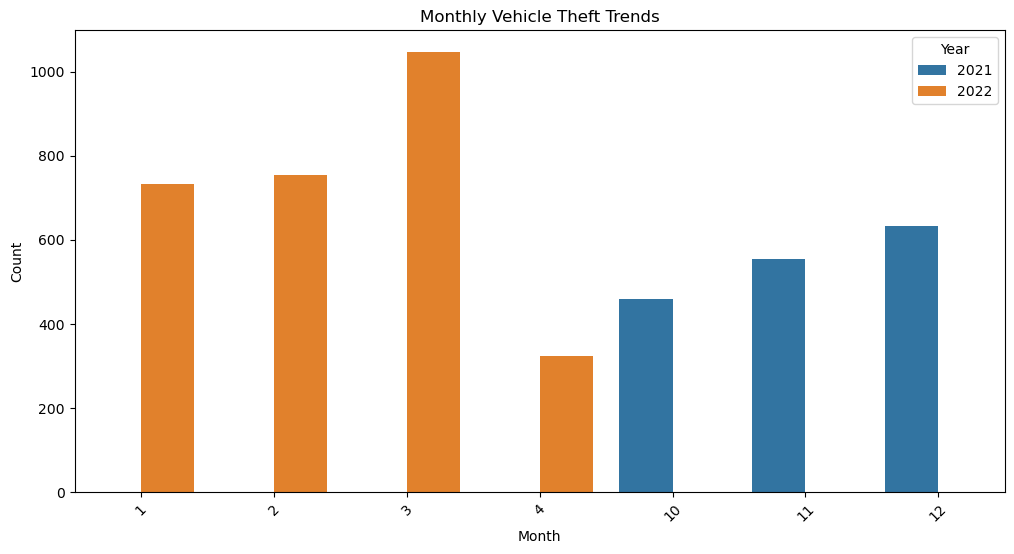

In [8]:

df['month'] = df['date_stolen'].dt.month
df['year'] = df['date_stolen'].dt.year

# Plotting temporal patterns of vehicle thefts
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='year', data=df)
plt.title('Monthly Vehicle Theft Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right')
plt.xticks(rotation=45)
plt.show()


### Logistic Regression for Feature Importance
In this section, we employ a logistic regression model to determine the most influential features for predicting vehicle theft incidents.

In [26]:

# Select relevant features for the model
features = ['vehicle_type', 'model_year', 'color']  # Add any other relevant features
target = 'is_certain_type'  

# Create a binary target variable (example: predict if the vehicle is a 'Trailer')
df[target] = (df['vehicle_type'] == 'Stationwagon').astype(int)     # As an example we chose the stationwagon

# One-hot encoding
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Splitting the data 
X = df_encoded
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\najyw\AppData\Local\Temp\ipykernel_11772\3173195766.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = (df['vehicle_type'] == 'Stationwagon').astype(int)     # As an example we chose the stationwagon


In [22]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict test set
y_pred = model.predict(X_test_scaled)

# Evaluatation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       730
           1       1.00      1.00      1.00       172

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902

Confusion Matrix:
 [[730   0]
 [  0 172]]


Given the perfect accuracy score of our logistic regression model, it's essential to verify that our model is not overfitting the data. Overfitting can occur when the model learns the training data too well, capturing noise instead of the underlying pattern, which leads to poor generalization to new data.

To ensure our model's robustness and its ability to generalize well to unseen data, we will employ cross-validation. Specifically, we will use five-fold cross-validation.


In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0



These results indicate that the logistic regression model achieved perfect accuracy on the test set, correctly classifying all instances of both classes ('Trailer' and non-'Trailer'). Based on the perfect accuracy achieved both in the evaluation and during cross-validation, along with the feature importance analysis, we conclude that the logistic regression model provides reliable predictions for classifying vehicles as 'Trailer' or not.

### Feature Importance Analysis

After training the logistic regression model, it's essential to understand the relative importance of different features in predicting vehicle theft. Feature importance analysis helps us identify which features have the most significant impact on the model's predictions.



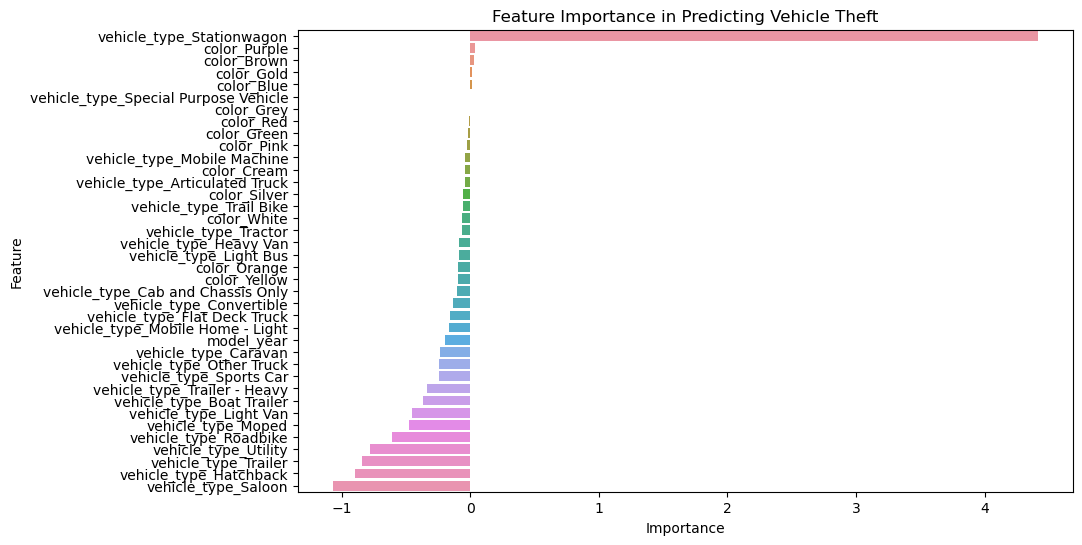

In [24]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Vehicle Theft')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



After analyzing the feature importance of our logistic regression model, we gained valuable insights into the factors driving vehicle theft predictions.
1. **Most Important Feature: Vehicle Type**
   - The most influential feature in predicting vehicle theft is the type of the vehicle, particularly whether it is a wagon (station wagon) or a Saloon. Vehicles classified as wagons or saloons exhibit the highest predictive power in determining theft incidents.

2. **Least Important Feature: Vehicle Color**
   - The color of the vehicle emerges as the least important feature in our model. While vehicle color may have aesthetic or persOnal preferences, our analysis suggests that it plays a minimal role in predicting vehicle theft.


### Key Findings
Commonly Stolen Vehicles: Station wagons, saloons, hatchbacks, and trailers constitute the majority of stolen vehicles. Station wagons stand out as the most frequently stolen type.

Temporal Patterns: Vehicle thefts show a notable increase in 2022 compared to 2021. The third month of the year exhibits the highest number of thefts, with the first two months also showing significant theft occurrences.

Model Insights: The top three most stolen vehicle models are Hilux, Courier, and Demio, indicating specific targets for theft incidents.

Model Accuracy: The logistic regression model achieved perfect accuracy in predicting vehicle types, indicating strong predictive power. Cross-validation confirmed the model's reliability.


## Conclusion

This project delves into the analysis of vehicle theft data from 2021 and 2022, uncovering essential insights into theft patterns and predictive factors. By meticulously cleaning and exploring the dataset, we identified trends in stolen vehicle types, colors, and models, along with temporal patterns of theft occurrences. Additionally, the development and evaluation of a logistic regression model provided valuable predictive capabilities, offering insights into factors influencing theft incidents.